#   **Transforming EDA Projects to Dashboards**



**Problem Statement:**

In the context of hotel booking operations, how can the utilization of Tableau facilitate a comprehensive comparative examination.
This inquiry seeks to leverage Tableau's visual analytics capabilities to uncover and illustrate the shared attributes, disparities, and distinctive patterns inherent to hotel bookings in these cities, thus elevating the depth and insightfulness of the study.
The hotel industry is characterized by its dynamic and multifaceted nature, where factors such as customer preferences, booking channels, and temporal variations play crucial roles in shaping the business landscape. The primary challenge faced by hotel management is the need to make informed decisions to enhance customer satisfaction, optimize resource allocation, and maximize revenue. This necessitates a deep understanding of the intricate patterns within the hotel booking data.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Almabetter project/module_2/Hotel Bookings.csv'
df_hotel_booking= pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset First Look
df_hotel_booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# first 10 rows
df_hotel_booking.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
# last 10 rows
df_hotel_booking.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# columns name
df_hotel_booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, columns = df_hotel_booking.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 119390
Number of columns: 32


### Dataset Information

In [ ]:
# Dataset Info
df_hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates = df_hotel_booking.duplicated()
# Count the number of duplicates
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")
# Display rows with duplicate values
duplicate_rows = df_hotel_booking[duplicates]
print("Rows with duplicate values:")
duplicate_rows

Number of duplicate rows: 31994
Rows with duplicate values:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [ ]:
# Remove duplicates
df_hotel_booking.drop_duplicates(inplace=True)

# Count the number of unique rows
unique_rows = df_hotel_booking.shape[0]

# Print the number of unique rows
print(unique_rows)

87396


In [ ]:
#Resetting the index of the DataFrame
df_hotel_booking.reset_index(inplace=True)

# Display the DataFrame to see the changes
df_hotel_booking

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
87392,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
87393,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
87394,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = df_hotel_booking.isnull().sum().sort_values(ascending=False)
print("Missing values count for each column:")
print(missing_values_count)

Missing values count for each column:
company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
index                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
distribution_channel                  0
is_repeated_guest                     0
hotel                                 0
market_segment                        0
meal                                  0
babies                                0
adults                                0
st

In [ ]:
# Create a summary DataFrame
df_copy=pd.DataFrame(index=df_hotel_booking.columns)
df_copy['Datatype']=df_hotel_booking.dtypes
df_copy['Non Null Value']=df_hotel_booking.count()
df_copy['Null Value']=df_hotel_booking.isnull().sum()
df_copy['percentage of Null value']=df_copy['Null Value']/df_copy['Non Null Value']*100
df_copy

,Datatype,Non Null Value,Null Value,percentage of Null value
index,int64,87396,0,0.000000
hotel,object,87396,0,0.000000
is_canceled,int64,87396,0,0.000000
lead_time,int64,87396,0,0.000000
arrival_date_year,int64,87396,0,0.000000
arrival_date_month,object,87396,0,0.000000
arrival_date_week_number,int64,87396,0,0.000000
arrival_date_day_of_month,int64,87396,0,0.000000
stays_in_weekend_nights,int64,87396,0,0.000000
stays_in_week_nights,int64,87396,0,0.000000


In [ ]:
# Calculate the total number of missing values in the DataFrame
total_missing_values = df_hotel_booking.isnull().sum().sum()

# Output the result
print(f"Total number of missing values in the entire dataset: {total_missing_values}")

Total number of missing values in the entire dataset: 94786


In [ ]:
# Assuming 'Column1' is the column you want to check
missing_values_in_column1 = df_hotel_booking['hotel'].isnull().sum()

print(f"Number of missing values in 'Column1': {missing_values_in_column1}")


Number of missing values in 'Column1': 0


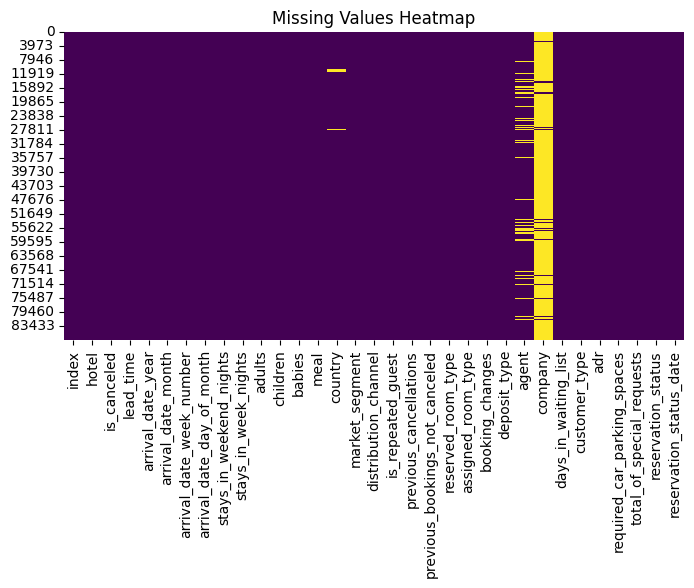

In [ ]:
# Visualizing the missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_hotel_booking' is your DataFrame
plt.figure(figsize=(8,4))
sns.heatmap(df_hotel_booking.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset comprises 119,390 rows and 32 columns, representing a substantial
volume of hotel booking records.The columns exhibit diverse data types, with a mix of object (categorical), integer, and float types. Categorical columns include details about the hotel, arrival date, meal preferences, market segments, and reservation status etc.Several columns contain missing values. Notably, 'company' has an exceptionally high percentage of missing values (93.8%), 'agent' has a significant number of missing values (15.9%), and 'country' has a moderate number of missing values (0.41%). Appropriate handling of missing values is crucial for meaningful analysis.

The dataset encompasses a variety of numeric features capturing booking details, such as lead time, number of nights stayed, and customer demographics. Categorical features include information about the hotel type, meal preferences, distribution channels, and reservation status.
Imputation strategies may be applied to handle missing values in numeric columns ('children', 'agent'). Categorical imputation is advisable for the 'country' column. The 'company' column, with an overwhelmingly high number of missing values, may be subject to removal based on its relevance.

The 'company' column presents a challenge due to its substantial missing values, necessitating careful consideration of its impact on analyses. Decisions on handling missing values and column relevance should align with the objectives of the analysis or modeling project.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_hotel=df_hotel_booking.copy()
print(list(df_hotel.columns))

['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
# Dataset Describe
df_hotel.describe(include='all')

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396.000000,...,87396,75203.000000,5259.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396
unique,NaN,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,NaN,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,NaN,53428,NaN,NaN,NaN,11257,NaN,NaN,NaN,NaN,...,86251,NaN,NaN,NaN,71986,NaN,NaN,NaN,63371,211
mean,59459.897089,NaN,0.274898,79.891368,2016.210296,NaN,26.838334,15.815541,1.005263,2.625395,...,NaN,94.138306,183.081384,0.749565,NaN,106.337246,0.084226,0.698567,NaN,NaN
std,36296.326461,NaN,0.446466,86.052325,0.686102,NaN,13.674572,8.835146,1.031921,2.053584,...,NaN,113.188172,130.557608,10.015731,NaN,55.013953,0.281533,0.831946,NaN,NaN
min,0.000000,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,26637.750000,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,...,NaN,9.000000,47.000000,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN
50%,57573.500000,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,...,NaN,14.000000,169.000000,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN
75%,93302.250000,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,...,NaN,240.000000,263.000000,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN


### Variables Description

**hotel:**
Type of hotel (Categorical: 'Resort Hotel' or 'City Hotel').

**is_canceled:**

Binary indicator of whether the booking was canceled (Binary: 0 for not canceled, 1 for canceled).

**lead_time:**

Number of days between booking date and arrival date (Numeric).

**arrival_date_year:**

Year of arrival date (Numeric).

**arrival_date_month:**

Month of arrival date (Categorical: January to December).

**arrival_date_week_number:**

Week number of the year for arrival date (Numeric).

**arrival_date_day_of_month:**

Day of the month for arrival date (Numeric).


**stays_in_weekend_nights:**

Number of weekend nights stayed (Numeric).
**stays_in_week_nights:**

Number of weekday nights stayed (Numeric).

**adults:**

Number of adults (Numeric).

**children:**

Number of children (Numeric).

**babies:**

Number of babies (Numeric).

**meal:**

Type of meal booked (Categorical: 'Undefined/SC', 'BB' for Bed & Breakfast, 'HB' for Half Board, 'FB' for Full Board).

**country:**

Country of origin of the customer (Categorical).

**market_segment:**

Market segment designation (Categorical).

**distribution_channel:**

Booking distribution channel (Categorical).

**is_repeated_guest:**

Binary indicator of whether the guest is a repeated guest (Binary: 0 for not repeated, 1 for repeated).

**previous_cancellations:**

Number of previous booking cancellations by the customer (Numeric).

**previous_bookings_not_canceled:**

Number of previous bookings not canceled by the customer (Numeric).

**reserved_room_type:**

Type of room reserved (Categorical).

**assigned_room_type:**

Type of room assigned (Categorical).

**booking_changes:**

Number of changes made to the booking (Numeric).

**deposit_type:**

Type of deposit made for the booking (Categorical).

**agent:**

ID of the booking agent (Numeric).

**company:**

ID of the company (Numeric).

**days_in_waiting_list:**

Number of days the booking was in the waiting list before it was confirmed (Numeric).

**customer_type:**

Type of customer (Categorical: 'Transient', 'Contract', 'Group', 'Transient-Party').

**adr:**

Average Daily Rate, indicating the average rental income per paid occupied room per night (Numeric).

**required_car_parking_spaces:**

Number of parking spaces requested by the customer (Numeric).

**total_of_special_requests:**

Number of special requests made by the customer (Numeric).

**reservation_status:**

Reservation last status (Categorical: 'Canceled', 'Check-Out', 'No-Show').

**reservation_status_date:**

Date when the reservation status was last updated (Date).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for colu in df_hotel.columns:
  non_unique_values=len(df_hotel[colu].unique())
  print(colu,':',non_unique_values)

index : 87396
hotel : 2
is_canceled : 2
lead_time : 479
arrival_date_year : 3
arrival_date_month : 12
arrival_date_week_number : 53
arrival_date_day_of_month : 31
stays_in_weekend_nights : 17
stays_in_week_nights : 35
adults : 14
children : 6
babies : 5
meal : 5
country : 178
market_segment : 8
distribution_channel : 5
is_repeated_guest : 2
previous_cancellations : 15
previous_bookings_not_canceled : 73
reserved_room_type : 10
assigned_room_type : 12
booking_changes : 21
deposit_type : 3
agent : 334
company : 353
days_in_waiting_list : 128
customer_type : 4
adr : 8879
required_car_parking_spaces : 5
total_of_special_requests : 6
reservation_status : 3
reservation_status_date : 926


In [ ]:
# Create a Pandas Series with unique values for each column
unique_values_series = pd.Series({col: df_hotel[col].unique() for col in df_hotel})

# Display the Pandas Series
print(unique_values_series)

index                             [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...
hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Calculate the total number of missing values for each column, sort in descending order, and display the top 4 columns
top_missing_values = df_hotel.isnull().sum().sort_values(ascending=False)[:4]

# Display the result
print(top_missing_values)

company     82137
agent       12193
country       452
children        4
dtype: int64


In [ ]:
# Select 'Null Value' and 'percentage of Null value' columns, sort by 'Null Value' column in descending order, and display the top 4 rows
df_copy[['Null Value', 'percentage of Null value']].sort_values('Null Value', ascending=False)[:4]


,Null Value,percentage of Null value
company,82137,1561.836851
agent,12193,16.213449
country,452,0.519875
children,4,0.004577


In [ ]:
# Drop the 'company' column
df_hotel.drop(['company'], axis=1,inplace=True)

In [ ]:
# Fill missing values with zeros
df_hotel.fillna(value=0, inplace=True)

# Check for remaining missing values
print(df_hotel.isnull().sum())

index                             0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# Fill missing values in the 'country' column with 'other'
df_hotel['country'].fillna(value='other', inplace=True)

# Check for remaining missing values in the 'country' column
print(df_hotel['country'].isnull().sum())

0


In [ ]:
# Fill missing values in the 'children' column with '0'
df_hotel['children'].fillna(value='0', inplace=True)

# Check for remaining missing values in the 'children' column
print(df_hotel['children'].isnull().sum())

0


In [ ]:
# information about df_hotel
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           87396 non-null  int64  
 1   hotel                           87396 non-null  object 
 2   is_canceled                     87396 non-null  int64  
 3   lead_time                       87396 non-null  int64  
 4   arrival_date_year               87396 non-null  int64  
 5   arrival_date_month              87396 non-null  object 
 6   arrival_date_week_number        87396 non-null  int64  
 7   arrival_date_day_of_month       87396 non-null  int64  
 8   stays_in_weekend_nights         87396 non-null  int64  
 9   stays_in_week_nights            87396 non-null  int64  
 10  adults                          87396 non-null  int64  
 11  children                        87396 non-null  float64
 12  babies                          

In [ ]:
# Convert 'children' column to integer data type
df_hotel['children'] = df_hotel['children'].astype(np.int64)

# Convert 'agent' column to integer data type
df_hotel['agent'] = df_hotel['agent'].astype(np.int64)

In [ ]:
# Modified information about df_hotel
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           87396 non-null  int64  
 1   hotel                           87396 non-null  object 
 2   is_canceled                     87396 non-null  int64  
 3   lead_time                       87396 non-null  int64  
 4   arrival_date_year               87396 non-null  int64  
 5   arrival_date_month              87396 non-null  object 
 6   arrival_date_week_number        87396 non-null  int64  
 7   arrival_date_day_of_month       87396 non-null  int64  
 8   stays_in_weekend_nights         87396 non-null  int64  
 9   stays_in_week_nights            87396 non-null  int64  
 10  adults                          87396 non-null  int64  
 11  children                        87396 non-null  int64  
 12  babies                          

In [ ]:
# Calculate 'total_night' column by summing 'stays_in_week_nights' and 'stays_in_weekend_nights'
df_hotel['total_night'] = df_hotel['stays_in_week_nights'] + df_hotel['stays_in_weekend_nights']

# Display the 'total_night' column
print(df_hotel['total_night'])

0        0
1        0
2        1
3        1
4        2
        ..
87391    7
87392    7
87393    7
87394    7
87395    9
Name: total_night, Length: 87396, dtype: int64


In [ ]:
# Calculate 'revenue' column by multiplying 'total_night' and 'adr'
df_hotel['revenue'] = df_hotel['total_night'] * df_hotel['adr']

# Display the 'revenue' column
print(df_hotel['revenue'])

0           0.00
1           0.00
2          75.00
3          75.00
4         196.00
          ...   
87391     672.98
87392    1578.01
87393    1103.97
87394     730.80
87395    1360.80
Name: revenue, Length: 87396, dtype: float64


In [ ]:
# Calculate 'total quest' column by adding 'adults' and 'children'
df_hotel['total quest'] = df_hotel['adults'] + df_hotel['children']

# Display the 'total uest' column
print(df_hotel['total quest'])

0        2
1        2
2        1
3        1
4        2
        ..
87391    2
87392    3
87393    2
87394    2
87395    2
Name: total quest, Length: 87396, dtype: int64


In [ ]:
# Create 'canceled' column based on the values in 'is_canceled' column
df_hotel['canceled'] = df_hotel['is_canceled'].replace([0, 1], ['not canceled', 'is canceled'])

# Display the 'canceled' column
print(df_hotel['canceled'])

0        not canceled
1        not canceled
2        not canceled
3        not canceled
4        not canceled
             ...     
87391    not canceled
87392    not canceled
87393    not canceled
87394    not canceled
87395    not canceled
Name: canceled, Length: 87396, dtype: object


In [ ]:
# Create 'is_repeated_guest_1' column based on the values in 'is_repeated_guest' column
df_hotel['is_repeated_guest_1'] = df_hotel['is_repeated_guest'].replace([0, 1], ['not repeated_guest', 'is repeated_guest'])

# Display the 'is_repeated_guest_1' column
print(df_hotel['is_repeated_guest_1'])

0        not repeated_guest
1        not repeated_guest
2        not repeated_guest
3        not repeated_guest
4        not repeated_guest
                ...        
87391    not repeated_guest
87392    not repeated_guest
87393    not repeated_guest
87394    not repeated_guest
87395    not repeated_guest
Name: is_repeated_guest_1, Length: 87396, dtype: object


In [ ]:
# Group by 'hotel' column and calculate total revenue for each hotel
hotel_wise_total_revenue = df_hotel.groupby('hotel')['revenue'].sum()

# Display the hotel-wise total revenue
print(hotel_wise_total_revenue)

hotel
City Hotel      18774101.54
Resort Hotel    15686837.77
Name: revenue, dtype: float64


In [ ]:
#display the dataset df_hotel
df_hotel

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_night,revenue,total quest,canceled,is_repeated_guest_1
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0.00,0,0,Check-Out,2015-07-01,0,0.00,2,not canceled,not repeated_guest
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0.00,0,0,Check-Out,2015-07-01,0,0.00,2,not canceled,not repeated_guest
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,75.00,0,0,Check-Out,2015-07-02,1,75.00,1,not canceled,not repeated_guest
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,75.00,0,0,Check-Out,2015-07-02,1,75.00,1,not canceled,not repeated_guest
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,98.00,0,1,Check-Out,2015-07-03,2,196.00,2,not canceled,not repeated_guest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,119385,City Hotel,0,23,2017,August,35,30,2,5,...,96.14,0,0,Check-Out,2017-09-06,7,672.98,2,not canceled,not repeated_guest
87392,119386,City Hotel,0,102,2017,August,35,31,2,5,...,225.43,0,2,Check-Out,2017-09-07,7,1578.01,3,not canceled,not repeated_guest
87393,119387,City Hotel,0,34,2017,August,35,31,2,5,...,157.71,0,4,Check-Out,2017-09-07,7,1103.97,2,not canceled,not repeated_guest
87394,119388,City Hotel,0,109,2017,August,35,31,2,5,...,104.40,0,0,Check-Out,2017-09-07,7,730.80,2,not canceled,not repeated_guest


In [ ]:
# Select 'hotel' and 'revenue' columns
df_hotel[['hotel','revenue']]

,hotel,revenue
0,Resort Hotel,0.00
1,Resort Hotel,0.00
2,Resort Hotel,75.00
3,Resort Hotel,75.00
4,Resort Hotel,196.00
...,...,...
87391,City Hotel,672.98
87392,City Hotel,1578.01
87393,City Hotel,1103.97
87394,City Hotel,730.80


In [ ]:
df_hotel.to_csv('hotel_booking_data.csv')

**Tableau public link:** https://public.tableau.com/app/profile/rahna.p/viz/hotelbookinganalysis_17162864856920/Bookingvs_CancellationRatesbyCustomer#1